In [2]:
from deepar.dataset.time_series import TimeSeries
from deepar.model.lstm import DeepARLearner


/Users/jgleason/Documents/NewKnowledge/ASED/LSTM-FCN/deep_ts/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jgleason/Documents/NewKnowledge/ASED/LSTM-FCN/deep_ts/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.72245488e+00,  2.58272822e-01, -3.82834939e-01,
        -4.99374469e-01],
       [-1.70320958e+00, -7.87926566e-02, -3.63281144e-01,
        -7.22040280e-01],
       [-1.68396427e+00, -4.67714362e-01, -3.76860168e-01,
        -9.43159800e-01],
       [-1.66471897e+00, -1.03813286e+00, -3.33407290e-01,
        -1.17510335e+00],
       [-1.64547366e+00, -1.16777343e+00, -3.06792403e-01,
        -1.21994577e+00],
       [-1.62622835e+00, -1.42705457e+00, -3.34493612e-01,
        -1.28334368e+00],
       [-1.60698305e+00, -9.34420409e-01, -3.93154997e-01,
        -1.14108496e+00],
       [-1.58773774e+00, -3.64001907e-01, -3.30148325e-01,
        -8.81308186e-01],
       [-1.56849244e+00,  4.13841504e-01, -3.24716715e-01,
        -3.91134144e-01],
       [-1.54924713e+00,  8.80547550e-01, -3.24173554e-01,
        -3.39410732e-02],
       [-1.53000182e+00,  1.29539737e+00, -3.35036773e-01,
         3.60362966e-01],
       [-1.51075652e+00,  1.39910982e+00, -3.40468383e-01,
      

In [2]:
import pandas as pd
sunspots_df = pd.read_csv('../datasets/seed_datasets_current/56_sunspots/TRAIN/dataset_TRAIN/tables/learningData.csv')
sunspots_df['year'] = pd.to_timedelta(pd.to_datetime(sunspots_df['year'], format='%Y')).dt.total_seconds()
sunspots_ds_one = TimeSeries(sunspots_df, target_idx = 4, timestamp_idx = 1, index_col=0)

In [1]:
from deepar.dataset.time_series import TimeSeries, TimeSeriesTest
import pandas as pd
import numpy as np
from deepar.model.learner import DeepARLearner

sunspots_df = pd.read_csv('../datasets/seed_datasets_current/56_sunspots/TRAIN/dataset_TRAIN/tables/learningData.csv')
# sunspots_df['sunspots'][5] = np.nan
# sunspots_df['sunspots'][10] = np.nan
# sunspots_df['sunspots'][15] = np.nan
# sunspots_df['sunspots'][20] = np.nan
# sunspots_df['sunspots'][25] = np.nan
sunspots_df['year'] = pd.to_timedelta(pd.to_datetime(sunspots_df['year'], format='%Y')).dt.total_seconds()
sunspots_ds_one = TimeSeries(sunspots_df, target_idx = 4, timestamp_idx = 1, index_col=0)

learner = DeepARLearner(sunspots_ds_one, verbose=1)
!rm -r ./tb_test
learner.fit(epochs = 1, batches = 10, early_stopping = False, checkpoint_dir = "./tb_test")

test_df = pd.read_csv('../datasets/seed_datasets_current/56_sunspots/TEST/dataset_TEST/tables/learningData.csv')
test_df['year'] = pd.to_timedelta(pd.to_datetime(test_df['year'], format='%Y')).dt.total_seconds()
test_ds = TimeSeriesTest(test_df, sunspots_ds_one, target_idx = 4, timestamp_idx = 1, index_col=0)

preds = learner.predict(test_ds, horizon = None, samples = 1, include_all_training = True).reshape(-1)
scores = pd.read_csv('../datasets/seed_datasets_current/56_sunspots/SCORE/dataset_SCORE/tables/learningData.csv')

# evaluate compared to D3M test set
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(scores['sunspots'], preds))
print(f'rms: {rms}')

I1114 10:30:53.540453 4659131840 learner.py:194] Start of epoch 0
W1114 10:30:53.632403 4659131840 base_layer.py:1814] Layer masking is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

I1114 10:30:54.059919 4659131840 learner.py:213] Epoch 0: Avg train loss over last 2 batches: 23164.994140625
I1114 10:30:54.393671 4659131840 learner.py:213] Epoch 0: Avg train loss over l

rms: 99.61291825690573


In [1]:
from deepar.dataset.time_series import TimeSeries, TimeSeriesTest
import pandas as pd
import numpy as np
from deepar.model.learner import DeepARLearner

pop_df = pd.read_csv('../datasets/seed_datasets_current/LL1_736_population_spawn/TRAIN/dataset_TRAIN/tables/learningData.csv')
pop_df = pop_df.set_index(['species', 'sector'])
pop_df['group'] = pop_df.index
pop_df['group'] = pop_df['group'].apply(lambda x: " ".join(x))
pop_df = pop_df.reset_index(drop=True)
pop_df['day'] = pd.to_timedelta(pd.to_datetime(pop_df['day'], unit='D')).dt.total_seconds()
pop_ds = TimeSeries(pop_df, target_idx = 2, timestamp_idx = 1, index_col=0, grouping_idx = 3, count_data = True)

learner = DeepARLearner(pop_ds, verbose = 1)
learner.fit(epochs = 1, batches = 10, early_stopping = False)

test_df = pd.read_csv('../datasets/seed_datasets_current/LL1_736_population_spawn/TEST/dataset_TEST/tables/learningData.csv')
test_df = test_df.set_index(['species', 'sector'])
test_df['group'] = test_df.index
test_df['group'] = test_df['group'].apply(lambda x: " ".join(x))
test_df = test_df.reset_index(drop=True)
test_df['day'] = pd.to_timedelta(pd.to_datetime(test_df['day'], unit='D')).dt.total_seconds()
test_ds = TimeSeriesTest(test_df, pop_ds, target_idx = 2, timestamp_idx = 1, index_col=0, grouping_idx = 3)

preds = learner.predict(test_ds, horizon = None, samples = 1, include_all_training = True)

# evaluate compared to D3M test set
scores = pd.read_csv('../datasets/seed_datasets_current/LL1_736_population_spawn/SCORE/dataset_SCORE/tables/learningData.csv')
from sklearn.metrics import mean_squared_error
from math import sqrt
print(scores['count'].shape)
# rms = sqrt(mean_squared_error(scores['count'], preds))
# print(f'rms: {rms}')



I1113 18:58:03.005178 4622554560 learner.py:194] Start of epoch 0
W1113 18:58:03.599973 4622554560 base_layer.py:1814] Layer masking is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

I1113 18:58:05.386742 4622554560 learner.py:213] Epoch 0: Avg train loss over last 2 batches: 0.06448540836572647
I1113 18:58:06.917441 4622554560 learner.py:213] Epoch 0: Avg train loss ov

test_samples shape: (144, 2, 1)
(288,)


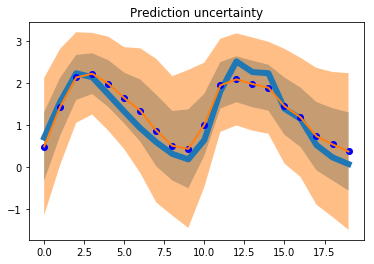

In [9]:
%matplotlib inline
from numpy.random import normal
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
window = 20
features = 9
def get_sample_prediction(sample, fn):
    sample = np.array(sample).reshape(1, window, features)
    output = fn([sample])
    samples = []
    for mu,sigma in zip(output[0].reshape(window), output[1].reshape(window)):
        samples.append(normal(loc=mu, scale=np.sqrt(sigma), size=1)[0])
    return np.array(samples)

batch = sunspots_ds_one.next_batch(1, window)
ress = []
for i in range(300):
    ress.append(get_sample_prediction(batch[0], dp_model.predict_theta_from_input))

res_df = pd.DataFrame(ress).T
tot_res = res_df


plt.plot(batch[1].reshape(window), linewidth=6)
tot_res['mu'] = tot_res.apply(lambda x: np.mean(x), axis=1)
tot_res['upper'] = tot_res.apply(lambda x: np.mean(x) + np.std(x), axis=1)
tot_res['lower'] = tot_res.apply(lambda x: np.mean(x) - np.std(x), axis=1)
tot_res['two_upper'] = tot_res.apply(lambda x: np.mean(x) + 2*np.std(x), axis=1)
tot_res['two_lower'] = tot_res.apply(lambda x: np.mean(x) - 2*np.std(x), axis=1)


plt.plot(tot_res.mu, 'bo')
plt.plot(tot_res.mu, linewidth=2)
plt.fill_between(x = tot_res.index, y1=tot_res.lower, y2=tot_res.upper, alpha=0.5)
plt.fill_between(x = tot_res.index, y1=tot_res.two_lower, y2=tot_res.two_upper, alpha=0.5)
plt.title('Prediction uncertainty')
plt.show()


In [75]:
from deepar.model.loss import negative_binomial_likelihood
from deepar.model.loss import gaussian_likelihood
import tensorflow as tf

sigma = 1.0
sigma1 = 2.0
sigma2 = 4.0
g = gaussian_likelihood([sigma] * 3)
b = negative_binomial_likelihood([sigma] * 3)
b1 = negative_binomial_likelihood([sigma1] * 3)
b2 = negative_binomial_likelihood([sigma2] * 3)

with tf.Session() as sess:
    y_true = tf.convert_to_tensor([1,1,1], dtype=tf.float32)
    y_pred0 = tf.convert_to_tensor([1,1,1], dtype=tf.float32)
    y_pred1 = tf.convert_to_tensor([2,2,2], dtype=tf.float32)
    y_pred2 = tf.convert_to_tensor([4,4,4], dtype=tf.float32)
    y_pred3 = tf.convert_to_tensor([8,8,8], dtype=tf.float32)
    print(b(y_true, y_pred0).eval())
    print(b(y_true, y_pred1).eval())
    print(b(y_true, y_pred2).eval())
    print(b(y_true, y_pred3).eval())
    print(b1(y_true, y_pred0).eval())
    print(b2(y_true, y_pred0).eval())

1.3862944
1.5040774
1.8325815
2.3150077
1.6479183
2.0117974


In [195]:
x = pd.to_datetime("21/11/06 16:30", format="%d/%m/%y %H:%M")
x.timetuple().tm_yday

325

In [141]:
df.groupby('cat').apply(lambda x: x.count())['cat']

cat
a    2
b    1
Name: cat, dtype: int64

In [146]:
df.groupby('cat').sum().reset_index()

,cat,0,1
0,a,3,9
1,b,3,6


In [153]:
for cat, c_d in df.groupby('cat'):
    c_d['age'] = c_d.index
    print(c_d)

/Users/jgleason/Documents/NewKnowledge/ASED/LSTM-FCN/deep_ts/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


   0  1 cat  age
0  1  4   a    0
1  2  5   a    1
   0  1 cat  age
2  3  6   b    2


In [158]:
df = df.drop('age', axis=1)

In [164]:
df['age'] = df.groupby('cat').cumcount()

In [166]:
df['age1'] = range(df.shape[0])

In [224]:
df

,0,1,cat,age,age1,same,target
0,1,4,a,0,0,1,1
1,2,5,a,1,1,1,2
2,3,6,b,0,2,1,3


In [233]:
from sklearn.preprocessing import StandardScaler
df[[0,1]] = StandardScaler().fit_transform(df[[0,1]])

/Users/jgleason/Documents/NewKnowledge/ASED/LSTM-FCN/deep_ts/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jgleason/Documents/NewKnowledge/ASED/LSTM-FCN/deep_ts/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [308]:
1 + df.groupby('cat')[0].agg('mean')

cat
a    0.387628
b    2.224745
Name: 0, dtype: float64